# Assignment 11
## Due July 09th
### names:

In [45]:
import numpy as np
from numpy.random import normal, binomial, beta
import os
import matplotlib.pyplot as plt

#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment11_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)

np.random.seed(42)

## Exercise 1

In [46]:
nb_samples = 10 ** 5
ks = [1, np.sqrt(2), 1.5, 2, 2*np.sqrt(2), 3, 4, 5, 6, 7, 8, 9, 10]

### a)

k: [1, 1.4142135623730951, 1.5, 2, 2.8284271247461903, 3, 4, 5, 6, 7, 8, 9, 10]
Empirical probabilities: [0.31841, 0.15697, 0.13364, 0.04553, 0.00468, 0.00264, 5e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Bound (rounded): [1.     0.5    0.4444 0.25   0.125  0.1111 0.0625 0.04   0.0278 0.0204
 0.0156 0.0123 0.01  ]


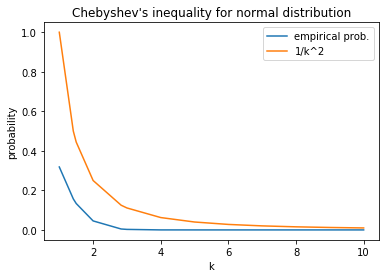

In [47]:
gaussian_samples = normal(size=nb_samples)

emp_probs = []
bound = [1/(k**2) for k in ks]
for k in ks:
    pos_outcomes = gaussian_samples[np.absolute(gaussian_samples) >= k]
    
    emp_probs.append(len(pos_outcomes)/nb_samples)

print('k:', ks)
print('Empirical probabilities:', emp_probs)
print('Bound (rounded):', np.round(bound, 4))
plt.plot(ks, emp_probs)
plt.plot(ks, bound)
plt.legend(['empirical prob.', '1/k^2'])
plt.title('Chebyshev\'s inequality for normal distribution')
plt.xlabel('k')
plt.ylabel('probability')

plt.savefig('Images/1a_chebyshev.png')

### b)

In [48]:
n = 10
p = 0.5

k: [1, 1.4142135623730951, 1.5, 2, 2.8284271247461903, 3, 4, 5, 6, 7, 8, 9, 10]
Empirical probabilities: [0.34377, 0.10896, 0.10896, 0.0214, 0.00192, 0.00192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Bound (rounded): [1.     0.5    0.4444 0.25   0.125  0.1111 0.0625 0.04   0.0278 0.0204
 0.0156 0.0123 0.01  ]


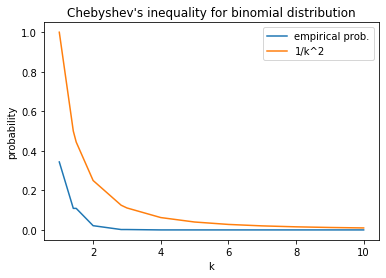

In [49]:
binomial_samples = binomial(n, p, size=nb_samples)
mean = n*p
std = np.sqrt(n*p*(1-p))
emp_probs = []
for k in ks:
    pos_outcomes = binomial_samples[np.absolute(binomial_samples - mean) >= k*std]
    
    emp_probs.append(len(pos_outcomes)/nb_samples)

print('k:', ks)
print('Empirical probabilities:', emp_probs)
print('Bound (rounded):', np.round(bound, 4))
plt.plot(ks, emp_probs)
plt.plot(ks, bound)
plt.legend(['empirical prob.', '1/k^2'])
plt.title('Chebyshev\'s inequality for binomial distribution')
plt.xlabel('k')
plt.ylabel('probability')

plt.savefig('Images/1b_chebyshev.png')

### c)

In [50]:
ts = np.arange(1, 11) * 0.1

Epsilons: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Empirical probabilities: [0.87168, 0.73924, 0.59136, 0.40966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Bound (rounded): [1.9604 1.8462 1.6705 1.4523 1.2131 0.9735 0.7506 0.5561 0.3958 0.2707]


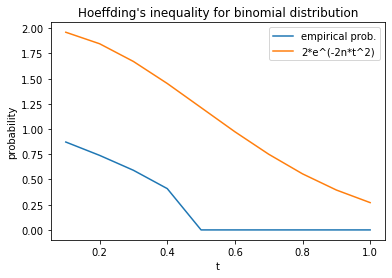

In [70]:
a, b = 0.5, 0.5
beta_samples = beta(a, b, size=nb_samples)
bound = 2/np.e**(2* ts**2) 
mean = 1/(1+ b/a)

emp_probs = []
for t in ts:
    pos_outcomes = binomial_samples[np.absolute(beta_samples - mean) >= t]
    
    emp_probs.append(len(pos_outcomes)/nb_samples)

print('Epsilons:', ts)
print('Empirical probabilities:', emp_probs)
print('Bound (rounded):', np.round(bound, 4))
plt.plot(ts, emp_probs)
plt.plot(ts, bound)
plt.legend(['empirical prob.', '2*e^(-2n*t^2)'])
plt.title('Hoeffding\'s inequality for binomial distribution')
plt.xlabel('t')
plt.ylabel('probability')

plt.savefig('Images/1c_hoeffding.png')

### d)

In [76]:
a1, b1 = 1,2
a2, b2 = 1,3
xs_1 = beta(a1, b1, size=nb_samples)
xs_2 = beta(a2, b2, size=nb_samples)
xs = xs_1 + xs_2


Epsilons: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Empirical probabilities: [0.7684, 0.54998, 0.3518, 0.1917, 0.08369, 0.03656, 0.0192, 0.00938, 0.00395, 0.00121]
Bound (rounded): [1.9604 1.8462 1.6705 1.4523 1.2131 0.9735 0.7506 0.5561 0.3958 0.2707]


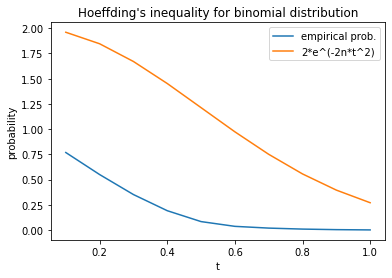

In [77]:
mean = 1/(1+b1/a1) + 1/(1+b2/a2)
bound = 2/np.e**(2* ts**2) 

emp_probs = []
for t in ts:
    pos_outcomes = xs[np.absolute(xs - mean) >= t]
    
    emp_probs.append(len(pos_outcomes)/nb_samples)

print('Epsilons:', ts)
print('Empirical probabilities:', emp_probs)
print('Bound (rounded):', np.round(bound, 4))
plt.plot(ts, emp_probs)
plt.plot(ts, bound)
plt.legend(['empirical prob.', '2*e^(-2n*t^2)'])
plt.title('Hoeffding\'s inequality for binomial distribution')
plt.xlabel('t')
plt.ylabel('probability')

plt.savefig('Images/1d_hoeffding.png')

### e)

In [78]:
a, b = 0.5, 0.5
ys = beta(a, b, size=nb_samples)
xs = ys + 2 * ys

Epsilons: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Empirical probabilities: [0.95625, 0.91402, 0.87095, 0.82737, 0.78298, 0.73703, 0.68964, 0.64114, 0.58992, 0.53568]
Bound (rounded): [1.9604 1.8462 1.6705 1.4523 1.2131 0.9735 0.7506 0.5561 0.3958 0.2707]


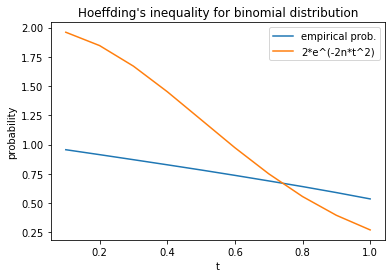

In [79]:
mean = 1/(1+b/a) + 2* 1/(1+b/a)
bound = 2/np.e**(2* ts**2)

emp_probs = []
for t in ts:
    pos_outcomes = xs[np.absolute(xs - mean) >= t]
    
    emp_probs.append(len(pos_outcomes)/nb_samples)

print('Epsilons:', ts)
print('Empirical probabilities:', emp_probs)
print('Bound (rounded):', np.round(bound, 4))
plt.plot(ts, emp_probs)
plt.plot(ts, bound)
plt.legend(['empirical prob.', '2*e^(-2n*t^2)'])
plt.title('Hoeffding\'s inequality for binomial distribution')
plt.xlabel('t')
plt.ylabel('probability')

plt.savefig('Images/1e_hoeffding.png')